# Now let's look at this data with clustering analysis

In [8]:
#!/usr/bin/python
import json
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df = pd.read_csv("ALL_Restaurant_Subway_Locations.csv")#,index_col=False)
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df['Latitude']=df['Latitude'].apply(pd.to_numeric, downcast='float', errors='coerce')
df.dtypes
#DF = df[['Latitude','Longitude']]
#DF.to_csv('../data/All_coords.csv')

Longitude              float64
Latitude               float64
Name                    object
BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                 object
CUISINE DESCRIPTION     object
TYPE                    object
Unnamed: 0.1            object
URL                     object
LINE                    object
Comments                object
coords                  object
dtype: object

In [10]:
bestPizza = pd.read_csv("../data/PizzaEssentials.csv",index_col=False)
bestPizza.head()

restPandI = pd.read_csv("../data/restPandI.csv",index_col=False)
restPandI['Latitude']=restPandI['Latitude'].apply(pd.to_numeric, downcast='float', errors='coerce')
#restPandI.drop(['Unnamed: 0'],axis=1, inplace=True)
print(restPandI.shape)
restPandI.head()
list(restPandI)

allPizza = pd.read_csv("../data/restPizza.csv",index_col = None)
allPizza['Latitude']=allPizza['Latitude'].apply(pd.to_numeric, downcast='float', errors='coerce')
print(allPizza.shape)
allPizza.head()

subway = pd.read_csv("../data/subwayStations.csv", index_col=0)
print(subway.shape)
#restPandI

(31171, 12)
(31171, 12)
(473, 8)


## THIS IS SO COOL
### SINCE WE HAVE A BUNCH OF POINTS, WE CAN PLOT ALL THE POINTS TO MAKE A DECOSTRUCTED STYLE GRAPHIC WITHOUT ANY UNDERLAYER



In [36]:
## DEFINE SOME FUNCTIONS TO BE USED LATER

# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.Longitude >= BB[0]) & (df.Longitude <= BB[1]) & \
           (df.Latitude >= BB[2]) & (df.Latitude <= BB[3]) 

def plot_hires(df, BB, figsize=(9, 9), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].Longitude, df[idx].Latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].Longitude, df[idx].Latitude, c=c[1], s=0.01, alpha=0.5)



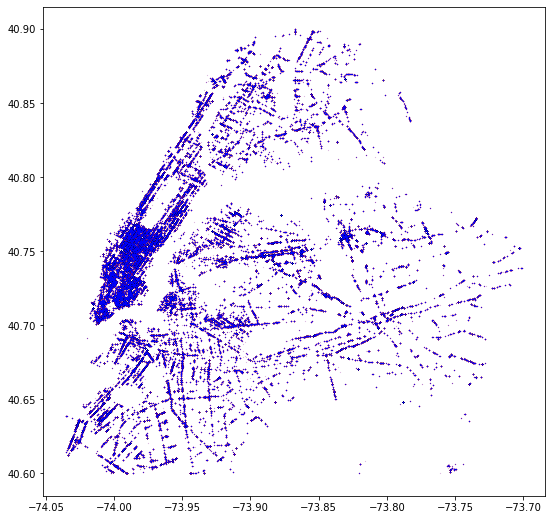

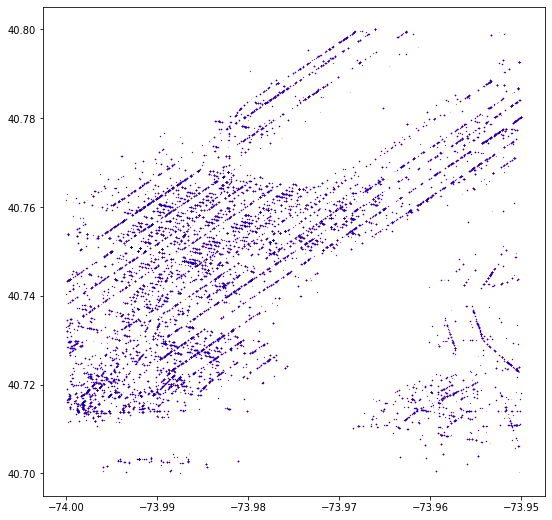

In [37]:
plot_hires(df, (-74.1, -73.7, 40.6, 40.9))
plot_hires(df, (-74, -73.95, 40.7, 40.8))

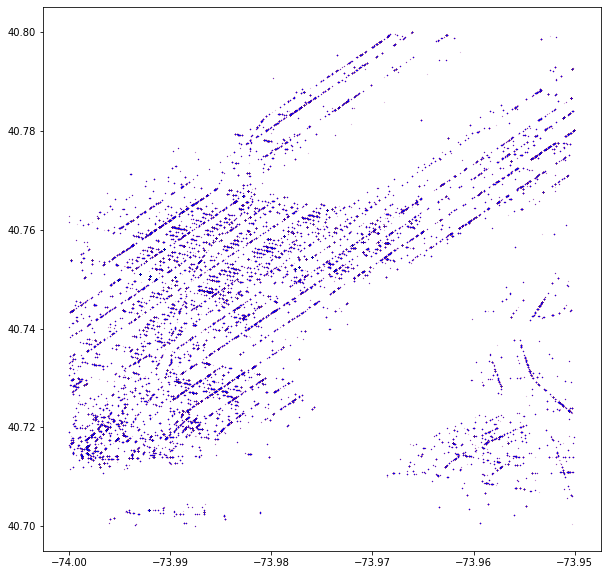

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
idx = select_within_boundingbox(df, (-74, -73.95, 40.7, 40.8))
ax.scatter(df[idx].Longitude, df[idx].Latitude, c='r', s=0.01, alpha=0.5)
ax.scatter(df[idx].Longitude, df[idx].Latitude, c='b', s=0.01, alpha=0.5)

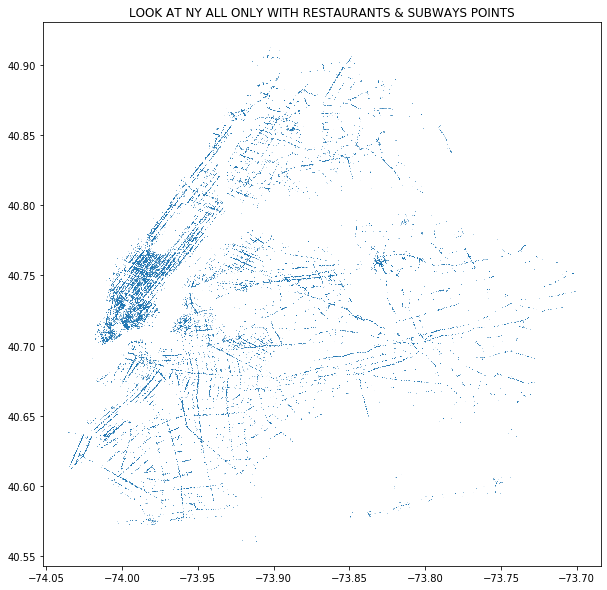

In [26]:
#  https://www.kaggle.com/drgilermo/dynamics-of-new-york-city-animation
longitude = list(df.Longitude)
latitude = list(df.Latitude)
plt.figure(figsize = (10,10))
plt.plot()
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.08)
plt.title('LOOK AT NY ALL ONLY WITH RESTAURANTS & SUBWAYS POINTS')
plt.show()



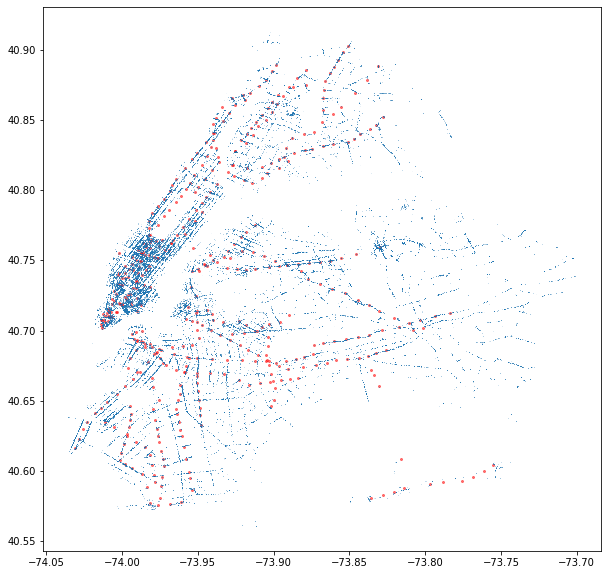

In [27]:
## CALL OUT SUBWAY STOPS TO SHOW ON GRID
#  https://www.kaggle.com/drgilermo/dynamics-of-new-york-city-animation
sub = df[(df["TYPE"] == 'subway')]
longitudeS = sub.Longitude
latitudeS = sub.Latitude
rest = df[(df["TYPE"] == 'restaurant')]
rest.to_csv("NY_All_rest.csv")
longitudeR = rest.Longitude
latitudeR = rest.Latitude

plt.figure(figsize = (10,10))
plt.plot()
plt.plot(longitudeS,latitudeS,'o', alpha = 0.5, markersize = 2, c='red')
plt.plot(longitudeR,latitudeR,'.', alpha = 0.4, markersize = 0.08)

plt.show()


# And now k means clustering
code base from ref: https://www.kaggle.com/drgilermo/dynamics-of-new-york-city-animation
## NOTE
### However, k-means is not an ideal algorithm for latitude-longitude spatial data because it minimizes variance, not geodetic distance. There is substantial distortion at latitudes far from the equator, like those of this data set. The algorithm would still “work” but its results are poor and there isn’t much that can be done to improve them.

In [40]:
from matplotlib import animation
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from dateutil import parser
import io
import base64
from IPython.display import HTML
from imblearn.under_sampling import RandomUnderSampler
from subprocess import check_output


In [41]:
loc_df = pd.DataFrame()
loc_df['longitude'] = longitudeR
loc_df['latitude'] = latitudeR
loc_df

,longitude,latitude
0,-73.902168,40.868622
1,-73.974161,40.753162
2,-73.994406,40.614952
3,-73.918465,40.615280
4,-73.859395,40.708622
...,...,...
382924,-73.985458,40.754520
382925,-73.864170,40.733429
382926,-73.845243,40.709560
382927,-73.918521,40.631195


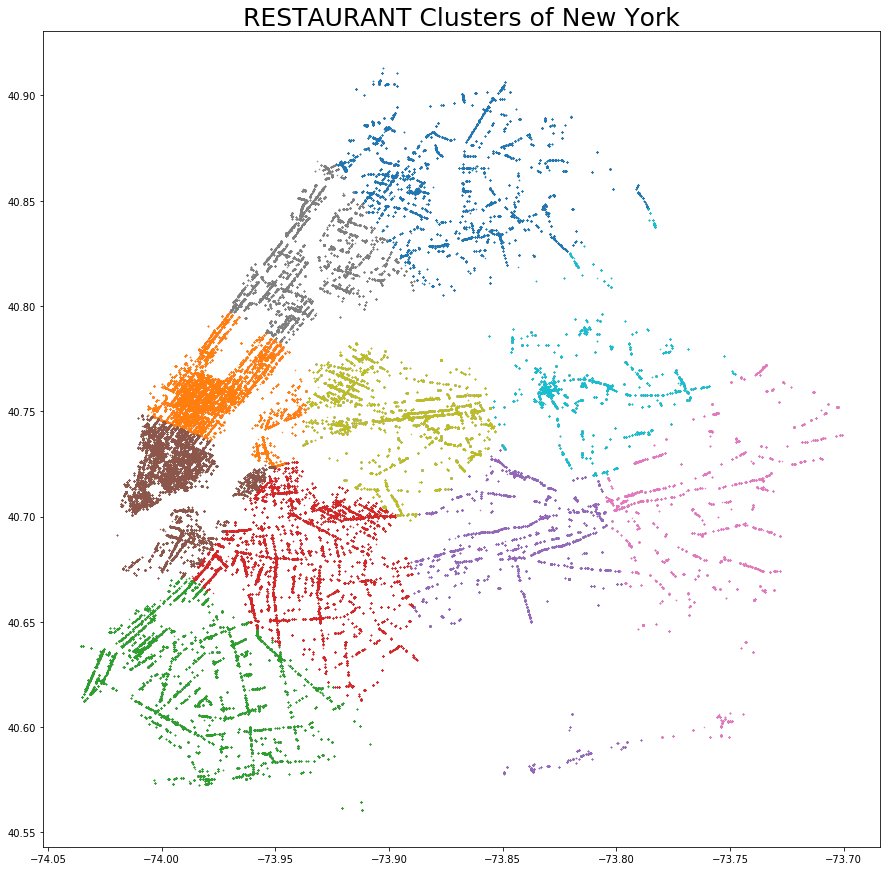

In [42]:
kmeans = KMeans(n_clusters=10, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

#loc_df = loc_df.sample(20000)
plt.figure(figsize = (15,15))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', markersize = 1)

plt.title('RESTAURANT Clusters of New York',fontsize=25)
plt.savefig('NYC Pizza Density Kmeans.png',bbox_inches='tight');
plt.show()

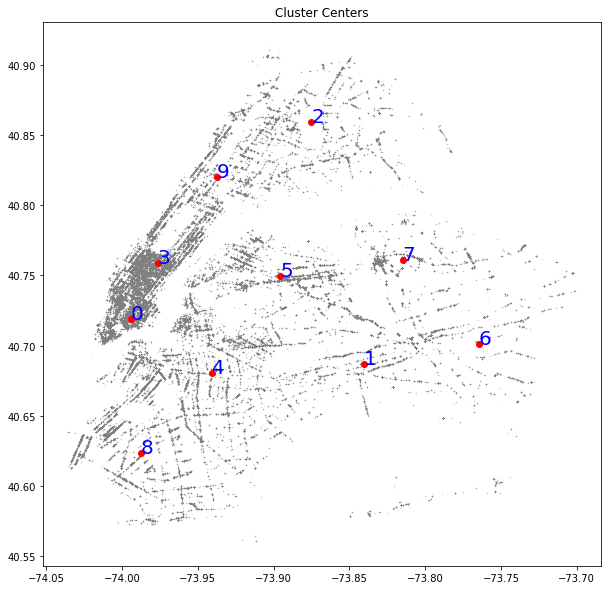

In [44]:
fig,ax = plt.subplots(figsize = (10,10))
for label in loc_df.label.unique():
    ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.4, markersize = 0.1, color = 'gray')
    ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')
    ax.annotate(label, (kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1]), color = 'b', fontsize = 20)
ax.set_title('Cluster Centers')
plt.show()


# Clustering with DBSCAN is More Accurate for Mapping 

In [46]:
##  SINCE THE DF'S ARE SO BIG (ONLY 400,000 BUT TIMES OUT HERE FOR SOME REASON? ;)), 
#  IT TAKES FOREVER SO IM DOING RANDOM SAMPLING AND ADDING %%TIME TO TIME THE CELL EXECUTION

from imblearn.under_sampling import RandomUnderSampler
#sample_df = restPandI.sample(39000)
sample_df=restPandI
df.dtypes

Longitude              float64
Latitude               float64
Name                    object
BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                 object
CUISINE DESCRIPTION     object
TYPE                    object
Unnamed: 0.1            object
URL                     object
LINE                    object
Comments                object
coords                  object
dtype: object

In [47]:
# FOR AN EXPLANATION OF HOW TO DO DBSCAN EFFICIENTLY WITH COORDS IN PYTHON
###  https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

coords = sample_df[["Latitude", "Longitude"]].values  #.values makes matrix now

In [48]:
%%time
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 12
CPU times: user 4.12 s, sys: 308 ms, total: 4.43 s
Wall time: 4.45 s


### Finding a cluster’s center-most point

In [49]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [50]:
lats, lons = zip(*centermost_points)
rs = pd.DataFrame({'lon':lons, 'lat':lats})
#Great! Now I’ve got my set of  ## spatially representative points. 
#But, I what if also want the city, country, and date information that was contained in the original full data set. 
#So, for each row of representative points, I pull the full row from the original data set where the latitude and longitude columns match the representative point’s latitude and longitude:
#rs = rep_points.apply(lambda row: df[(df['lat']==row['lat']) &amp;&amp; (df['lon']==row['lon'])].iloc[0], axis=1)

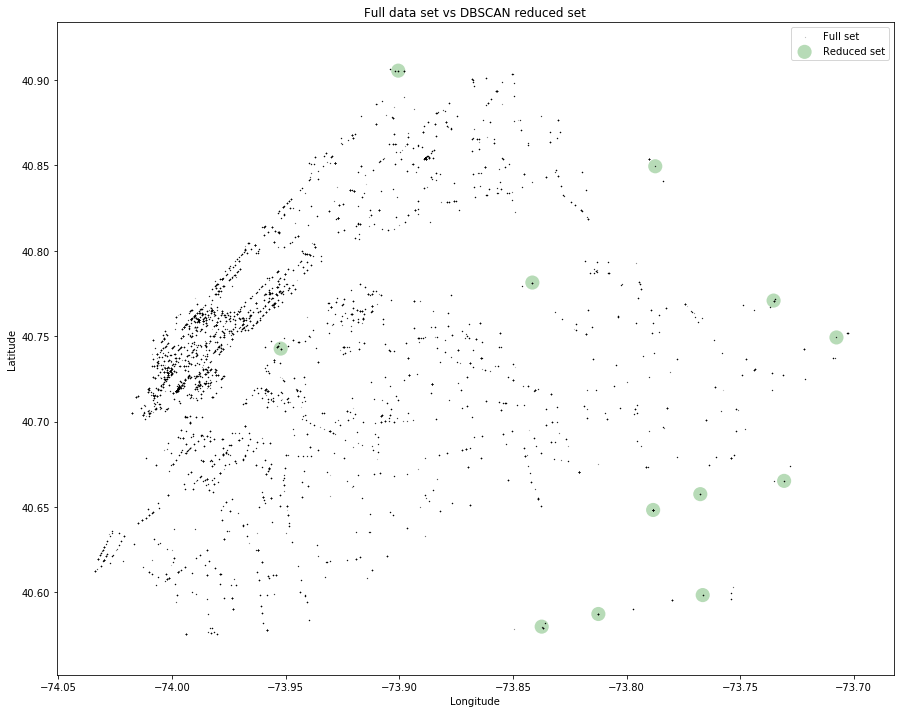

In [52]:
fig, ax = plt.subplots(figsize=[15, 12])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=200)
df_scatter = ax.scatter(sample_df['Longitude'], sample_df['Latitude'], c='k', alpha=0.9, s=.01)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

# -----     Plot density maps by square mile  ...FROM SCRATCH by making rasters

In [53]:
# For this plot and further analysis, we need a function to calculate the distance in miles between locations in lon,lat coordinates.
# This function is based on https://stackoverflow.com/questions/27928/
# calculate-distance-between-two-latitude-longitude-points-haversine-formula 
# return distance in miles

# We'll include THE ONLY ITALIAN RESTAURANTS DF "restPandI"

BB=(-74.3,-73.7,40.5,40.9)
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

# First calculate two arrays with datapoint density per sq mile
n_lon, n_lat = 200, 200 # number of grid bins per longitude, latitude dimension
density_sub, density_rest, density_Italian = np.zeros((n_lat, n_lon)), np.zeros((n_lat, n_lon)), np.zeros((n_lat, n_lon)) # prepare arrays

# To calculate the number of datapoints in a grid area, the numpy.digitize() function is used. 
# This function needs an array with the (location) bins for counting the number of datapoints
# per bin.
bins_lon = np.zeros(n_lon+1) # bin
bins_lat = np.zeros(n_lat+1) # bin
delta_lon = (BB[1]-BB[0]) / n_lon # bin longutide width
delta_lat = (BB[3]-BB[2]) / n_lat # bin latitude height
bin_width_miles = distance(BB[2], BB[1], BB[2], BB[0]) / n_lon # bin width in miles
bin_height_miles = distance(BB[3], BB[0], BB[2], BB[0]) / n_lat # bin height in miles
for i in range(n_lon+1):
    bins_lon[i] = BB[0] + i * delta_lon
for j in range(n_lat+1):
    bins_lat[j] = BB[2] + j * delta_lat
    
# Digitize per longitude, latitude dimension
inds_sub_lon = np.digitize(sub.Longitude, bins_lon)
inds_sub_lat = np.digitize(sub.Latitude, bins_lat)
inds_rest_lon = np.digitize(rest.Longitude, bins_lon)
inds_rest_lat = np.digitize(rest.Latitude, bins_lat)
inds_IT_lon = np.digitize(restPandI.Longitude, bins_lon)
inds_IT_lat = np.digitize(restPandI.Latitude, bins_lat)

# Count per grid bin
# note: as the density_pickup will be displayed as image, the first index is the y-direction, 
#       the second index is the x-direction. Also, the y-direction needs to be reversed for
#       properly displaying (therefore the (n_lat-j) term)
dxdy = bin_width_miles * bin_height_miles
for i in range(n_lon):
    for j in range(n_lat):
        density_sub[j, i] = np.sum((inds_sub_lon==i+1) & (inds_sub_lat==(n_lat-j))) / dxdy
        density_rest[j, i] = np.sum((inds_rest_lon==i+1) & (inds_rest_lat==(n_lat-j))) / dxdy
        density_Italian[j, i] = np.sum((inds_IT_lon==i+1) & (inds_IT_lat==(n_lat-j))) / dxdy

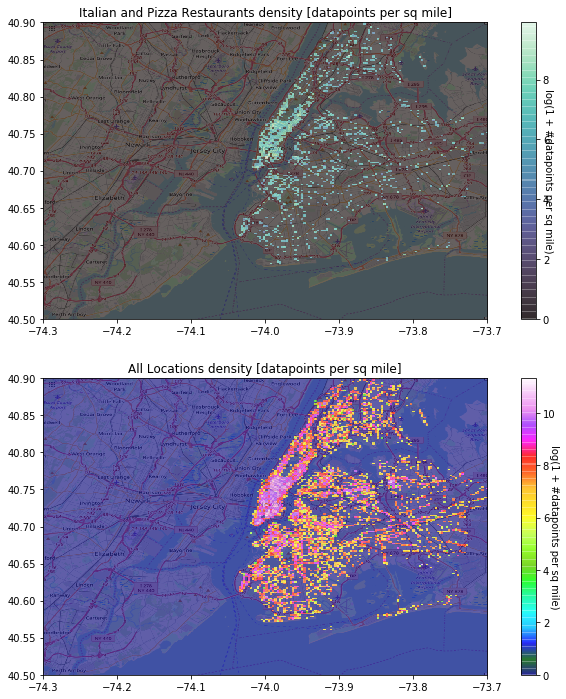

In [54]:
nyc_map = plt.imread('../data/nyc_-74.3_-73.7_40.5_40.9.png')
# Plot the density arrays
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
axs[0].imshow(nyc_map, zorder=0, extent=BB);
im = axs[0].imshow(np.log1p(density_Italian), zorder=1, extent=BB, alpha=0.6, cmap='mako')
axs[0].set_title('Italian and Pizza Restaurants density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[0])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)

#fig, axs = plt.subplots(1, 2,2, figsize=(12, 12))
axs[1].imshow(nyc_map, zorder=0, extent=BB);
im = axs[1].imshow(np.log1p(density_rest), zorder=1, extent=BB, alpha=0.6, cmap='gist_ncar')
axs[1].set_title('All Locations density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[1])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)
plt.savefig('NYC Density From Scratch.png',bbox_inches='tight');


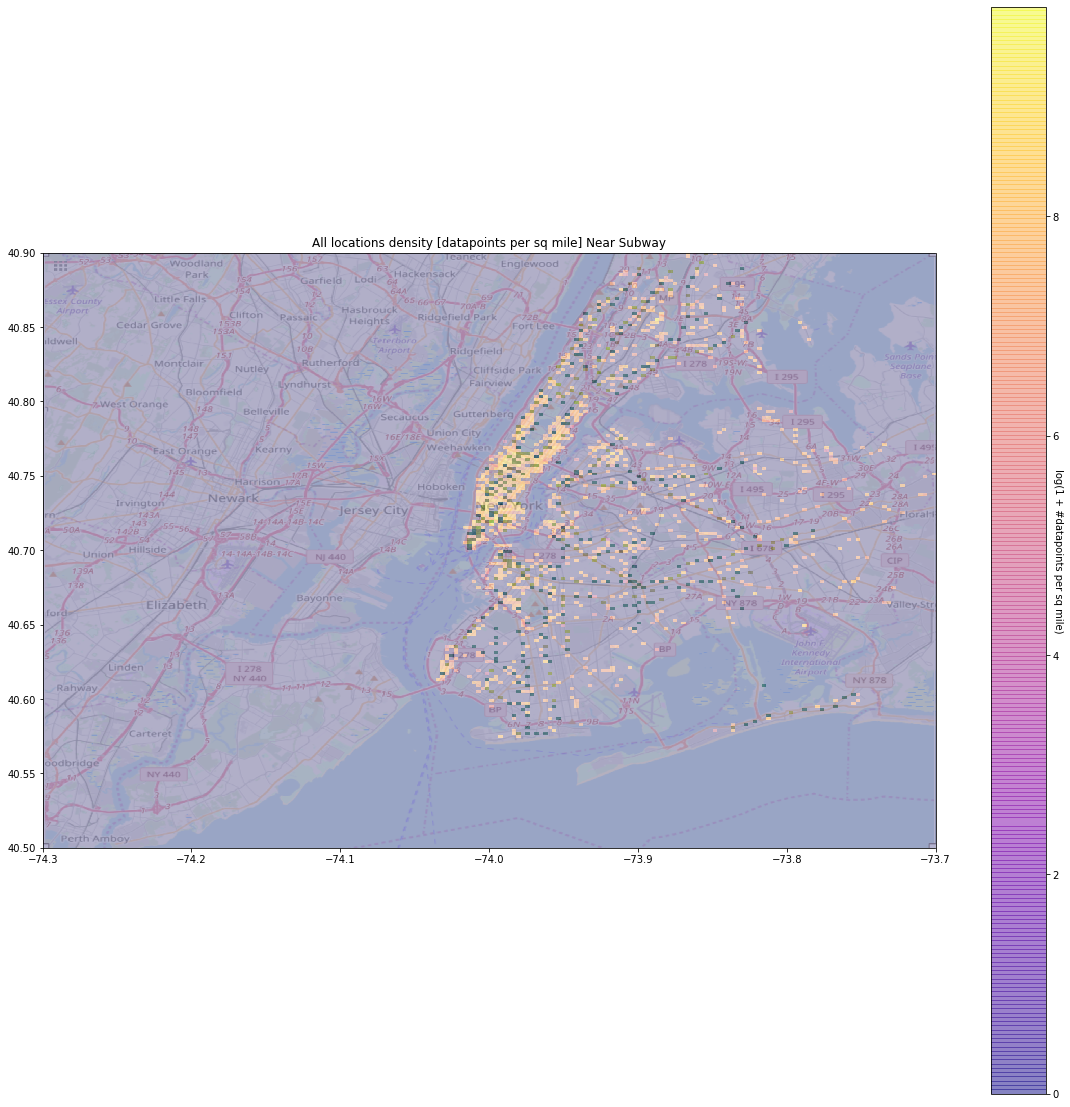

In [55]:
nyc_map = plt.imread('../data/nyc_-74.3_-73.7_40.5_40.9.png')
# Plot the density arrays
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(nyc_map, zorder=0, extent=BB);
ax.imshow(np.log1p(density_sub), zorder=2, extent=BB, alpha=0.4, cmap='YlGn')
im = ax.imshow(np.log1p(density_Italian), zorder=1, extent=BB, alpha=0.5, cmap='plasma')
ax.set_title('All locations density [datapoints per sq mile] Near Subway')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)
plt.savefig('NYC Pizza Density Near Subway Stations.png',bbox_inches='tight');


### THIS OVERLAY ABOVE IMPLIES THAT PIZZA PLACES ARE MORE LIKELY TO BE BY SUBWAY ENTRANCES!

#### Play with the colors in the "cmap" kwarg to get get more distinct differences.  Overlaying the 2 rasters does wash it out a bit

# Now we'll use FOLIUM and GEOPANDAS to visualzie a heat map.  

## This heat map will show the health inspectio scores

In [76]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity
restPandI.dtypes
#restPandI.drop(['Unnamed: 0'],axis=1, inplace=True)

Longitude                 float64
Latitude                  float64
Name                       object
BORO                       object
BUILDING                   object
STREET                     object
ZIPCODE                   float64
CUISINE DESCRIPTION        object
SCORE                     float64
VIOLATION DESCRIPTION      object
GRADE                      object
geometry                 geometry
dtype: object

In [57]:
#!pip install folium
import folium
from folium.plugins import HeatMap

     |████████████████████████████████| 92kB 739kB/s eta 0:00:01


In [120]:
# Initialize a folium map and see what the default crs data is in case we need to convert the shapefile we loaded
distric_map = folium.Map(location=[40.7306,-73.9352], zoom_start=9, tiles='cartodbpositron' ) 
print('default map crs: ',distric_map.crs)


default map crs:  EPSG3857


In [106]:
import geopandas
import shapely
from shapely.geometry import Point

restPandI['geometry'] = restPandI[['Longitude', 'Latitude']].values.tolist()
# Change the coordinates to a geoPoint
restPandI['geometry'] = restPandI['geometry'].apply(Point)
restGEO = geopandas.GeoDataFrame(restPandI, geometry='geometry')
restGEO.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
restGEO = restGEO.to_crs({'init':'epsg:3857'})
restGEO.to_file('../shapefiles/restPandIGEO.shp', driver='Shapefile',encoding="utf-8")
restGEO

/Users/RoscoeBColtrane/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Longitude,Latitude,Name,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,SCORE,VIOLATION DESCRIPTION,GRADE,geometry
0,-73.891889,40.824336,LITTLE CAESARS,Bronx,1054,SOUTHERN BOULEVARD,10459.0,Pizza,7.0,Non-food contact surface improperly constructe...,A,POINT (-8225607.424 4986465.763)
1,-74.032595,40.619722,NINO'S PIZZA,Brooklyn,9110,3 AVENUE,11209.0,Pizza,47.0,Evidence of mice or live mice present in facil...,NaN,POINT (-8241270.827 4956411.531)
2,-74.010325,40.648612,CAFE LORE,Brooklyn,4601,4 AVENUE,11220.0,Italian,34.0,"Toxic chemical improperly labeled, stored or u...",NaN,POINT (-8238791.639 4960649.403)
3,-73.947906,40.804435,RISTORANTE SETTEPANI,Manhattan,196,LENOX AVENUE,10026.0,Italian,11.0,Proper sanitization not provided for utensil w...,A,POINT (-8231843.211 4983538.524)
4,-73.959227,40.767632,BOTTEGA RESTAURANT,Manhattan,1331,2 AVENUE,10021.0,Italian,22.0,Non-food contact surface improperly constructe...,NaN,POINT (-8233103.503 4978127.683)
...,...,...,...,...,...,...,...,...,...,...,...,...
31166,-73.888801,40.657246,PAPA JOHN'S,Brooklyn,529,STANLEY AVE,11207.0,Pizza,NaN,Manufacture of frozen dessert not authorized o...,NaN,POINT (-8225263.756 4961916.229)
31167,-74.004713,40.741869,CAPPONE'S,Manhattan,75,9TH AVE,10011.0,Italian,19.0,Food not protected from potential source of co...,NaN,POINT (-8238166.968 4974341.640)
31168,-73.912157,40.613199,DAGAN PIZZA,Brooklyn,6187,STRICKLAND AVENUE,11234.0,Pizza,13.0,Facility not vermin proof. Harborage or condit...,A,POINT (-8227863.666 4955454.903)
31169,-73.878323,40.872737,DOMINO'S,Bronx,315,E 204TH ST,10467.0,Pizza,12.0,Facility not vermin proof. Harborage or condit...,A,POINT (-8224097.244 4993588.533)


In [115]:
# REMOVE THE DAMN NULLS AND NANS

restGEO.dropna() 
#restGEO = restGEO[restGEO['SCORE'].notna()]
#del restGEO['VIOLATION DESCRIPTION']
restGEO.to_file('../shapefiles/restPandIGEO.shp', driver='Shapefile',encoding="utf-8")
restGEO.isnull().sum()
#restGEO.info


Longitude              0
Latitude               0
Name                   0
BORO                   0
BUILDING               0
STREET                 0
ZIPCODE                0
CUISINE DESCRIPTION    0
SCORE                  0
geometry               0
dtype: int64

In [133]:

restPI_no_null = restPandI.dropna() 
restPI_no_null = restPI_no_null.dropna(subset = ['SCORE'],how='all') 
#del restPandI['VIOLATION DESCRIPTION']
#del restPandI['GRADE']
#restPandI.to_file('../data/restPI_no_null.csv)
restPI_no_null.isnull().sum()
#restGEO.info

Longitude              0
Latitude               0
Name                   0
BORO                   0
BUILDING               0
STREET                 0
ZIPCODE                0
CUISINE DESCRIPTION    0
SCORE                  0
geometry               0
dtype: int64

In [134]:
import pandas as pd 
import folium
from folium.plugins import HeatMap

for_map = restPI_no_null


hmap = folium.Map(location=[40.7306,-73.9352], zoom_start=9, )

hm_wide = HeatMap( list(zip(for_map.Latitude.values, for_map.Longitude.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

#And then to save the generated leaflet map to file: 
hmap.add_child(hm_wide)
hmap.save('heatmap.html')

# -------------------DONE----------------------------